In [121]:
import numpy as np
import f90nml
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches


In [122]:
nml    = f90nml.read('par_2')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

# rdim = 101
# tdim = 713
# pdim = 1

# rdim = 1
# tdim = 357
# pdim = 177

rdim = 101
tdim = 713
pdim = 1

theta=np.linspace(thstart,thend,tdim)
phi=np.linspace(phstart,phend,pdim)
radius=np.linspace(rastart,raend,rdim)
# infile='/Users/yangkai/Works/program/QSL_old_test/QSL_sphere/dipole/Q_calc_3.binary'
# infile='/Users/yangkai/Works/program/QSL_improve/QSL_sphere/test/qsl_result.binary'
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*5)
q    = np.reshape(data,(3,pdim,tdim,rdim))
# q_cal_11=np.flip(np.abs(q[0,0,:,0]))
# t11=np.linspace(thstart,thend,tdim)

In [123]:
q.shape,radius.shape,theta.shape,phi.shape

((3, 1, 713, 101), (101,), (713,), (1,))

/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_33467/1622215245.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[0].pcolormesh(theta,radius,q[0,0].T,cmap='jet')
/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_33467/1622215245.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[1].pcolormesh(theta,radius,q[1,0].T,cmap='jet')
/var/folders/rr/2n3c73qx6r141zscx2v__r9w0000gn/T/ipykernel_33467/1622215245.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[2].pcolormesh(theta,radius,q[2,0].T,cmap='jet')


(0.0, 3.141592653589793)

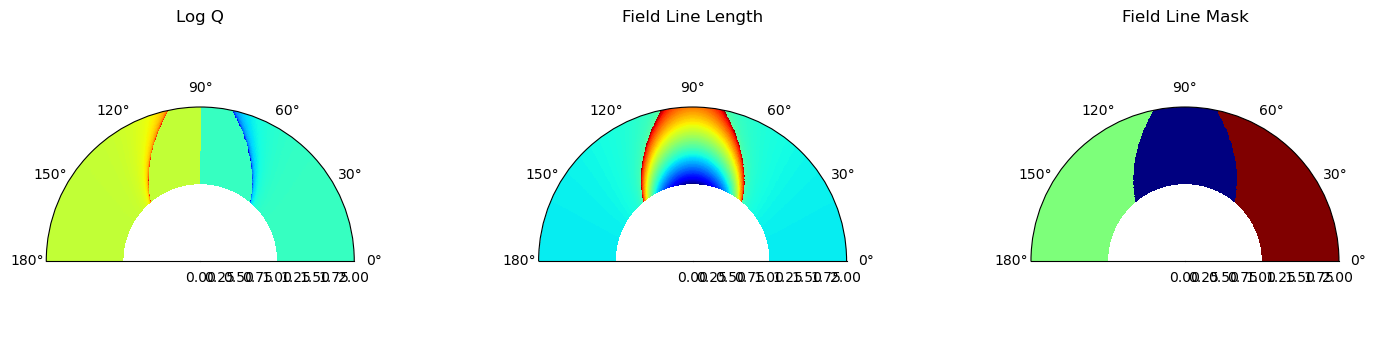

In [124]:
fig, ax = plt.subplots(1,3,figsize=(18,4),subplot_kw={'projection': 'polar'})
ax[0].pcolormesh(theta,radius,q[0,0].T,cmap='jet')
ax[0].set_title('Log Q')
ax[0].set_xlim([0,np.pi])
ax[1].pcolormesh(theta,radius,q[1,0].T,cmap='jet')
ax[1].set_title('Field Line Length')
ax[1].set_xlim([0,np.pi])
ax[2].pcolormesh(theta,radius,q[2,0].T,cmap='jet')
ax[2].set_title('Field Line Mask')
ax[2].set_xlim([0,np.pi])


In [125]:
nml    = f90nml.read('par_3')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

# rdim = 101
# tdim = 713
# pdim = 1

# rdim = 1
# tdim = 357
# pdim = 177

rdim = 1
tdim = 713
pdim = 353

theta=np.linspace(thstart,thend,tdim)
phi=np.linspace(phstart,phend,pdim)
radius=np.linspace(rastart,raend,rdim)
# infile='/Users/yangkai/Works/program/QSL_old_test/QSL_sphere/dipole/Q_calc_3.binary'
# infile='/Users/yangkai/Works/program/QSL_improve/QSL_sphere/test/qsl_result.binary'
f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*5)
q    = np.reshape(data,(3,pdim,tdim,rdim))
# q_cal_11=np.flip(np.abs(q[0,0,:,0]))
# t11=np.linspace(thstart,thend,tdim)

In [126]:
q.shape

(3, 353, 713, 1)

Text(0.5, 1.0, 'Field Line Mask')

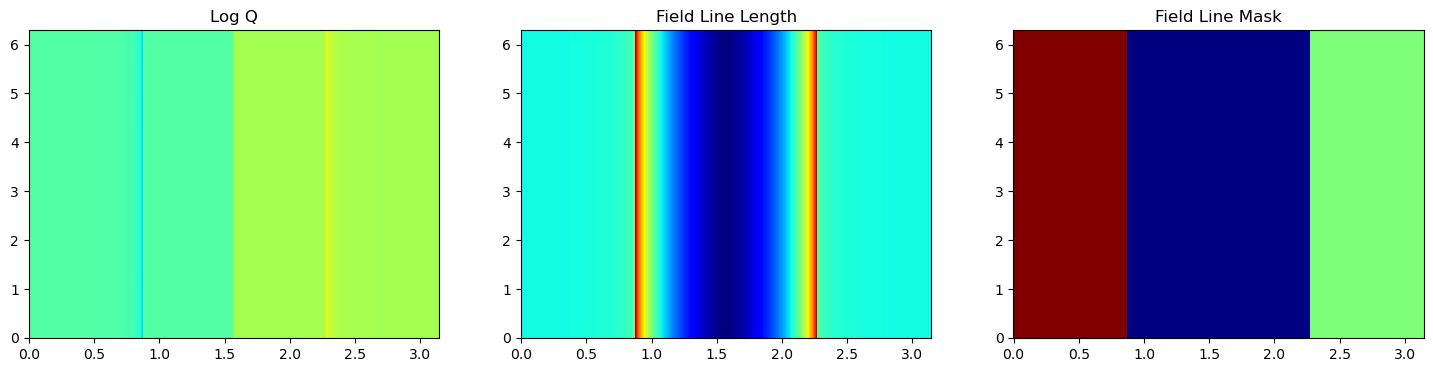

In [127]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
ax[0].pcolormesh(theta,phi,q[0,:,:,0],cmap='jet',vmax=3,vmin=-3)
ax[0].set_title('Log Q')
# ax[0].set_xlim([0,np.pi])
ax[1].pcolormesh(theta,phi,q[1,:,:,0],cmap='jet')
ax[1].set_title('Field Line Length')
# ax[1].set_xlim([0,np.pi])
ax[2].pcolormesh(theta,phi,q[2,:,:,0],cmap='jet')
ax[2].set_title('Field Line Mask')
# ax[2].set_xlim([0,np.pi])
